In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import chardet
import os
import io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from scipy import stats
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Sección nueva

In [ ]:
path = kagglehub.dataset_download("nelgiriyewithana/most-streamed-spotify-songs-2024")

print("Path to dataset files:", path)

files = os.listdir(path)
print("Archivos descargados:", files)

file_name = files[0]
file_path = os.path.join(path, file_name)


with open(file_path, "rb") as f:
    raw_data = f.read(50000)

encoding = chardet.detect(raw_data)["encoding"]
print("Codificación detectada:", encoding)

df = pd.read_csv(file_path, encoding=encoding)

Using Colab cache for faster access to the 'most-streamed-spotify-songs-2024' dataset.
Path to dataset files: /kaggle/input/most-streamed-spotify-songs-2024
Archivos descargados: ['Most Streamed Spotify Songs 2024.csv']
Codificación detectada: ISO-8859-1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [ ]:
cols_to_convert = ["All Time Rank", "Spotify Streams", "Spotify Playlist Count", "Spotify Playlist Reach"]

for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

for col in df.columns[5:]:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

In [ ]:
df = df.drop(["Track", "Album Name", "Artist", "Release Date", "ISRC","TIDAL Popularity", "Soundcloud Streams", "SiriusXM Spins"], axis = 1)
display(df.head())

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,1.0,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,...,1.505970e+08,210.0,40975.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0.0
1,2.0,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,...,1.563804e+08,188.0,40778.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1.0
2,3.0,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,...,3.737850e+08,190.0,74333.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0.0
3,4.0,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,...,3.351189e+09,394.0,1474799.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0.0
4,5.0,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,...,1.127639e+08,182.0,12185.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1.0


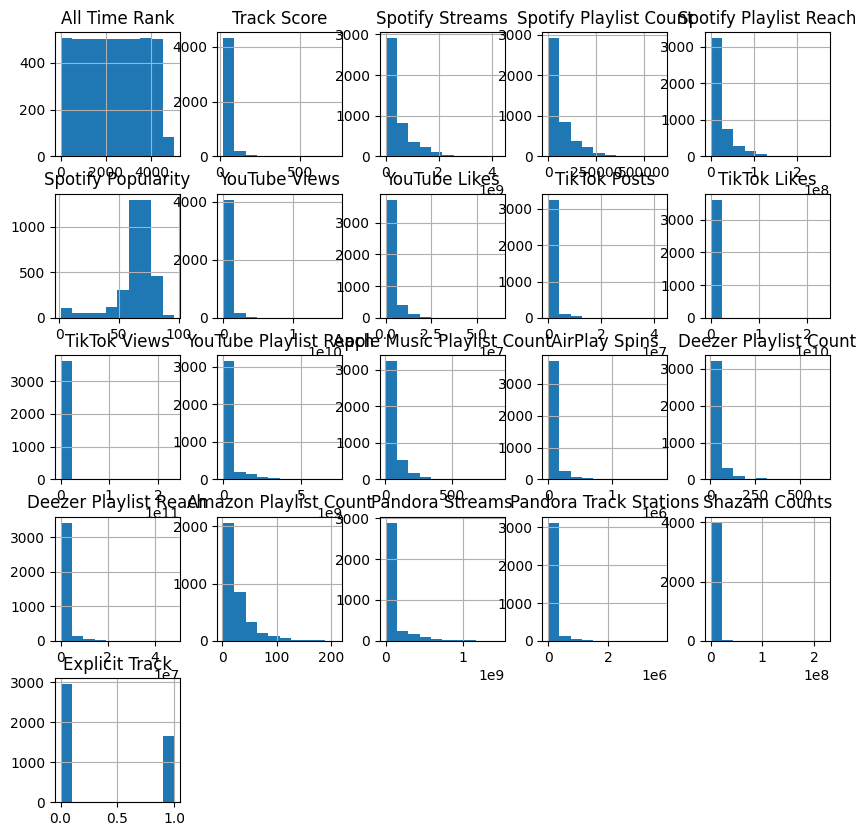

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

In [ ]:
Columnas = df.select_dtypes(include=['int64', 'float64']).columns
Media = SimpleImputer(strategy='median')
df[Columnas] = Media.fit_transform(df[Columnas])
df.head(10)

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,1.0,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,...,1.505970e+08,210.0,40975.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0.0
1,2.0,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,...,1.563804e+08,188.0,40778.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1.0
2,3.0,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,...,3.737850e+08,190.0,74333.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0.0
3,4.0,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,...,3.351189e+09,394.0,1474799.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0.0
4,5.0,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,2.653441e+07,...,1.127639e+08,182.0,12185.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1.0
5,6.0,410.1,6.706654e+08,105892.0,175421034.0,83.0,1.311481e+08,1392593.0,4202367.0,2.149435e+08,...,2.867223e+09,138.0,522042.0,86.0,17167254.0,152.0,138529362.0,50982.0,4517131.0,1.0
6,7.0,407.2,9.001588e+08,73118.0,201585714.0,86.0,3.087231e+08,4120760.0,182200.0,2.958494e+07,...,4.601580e+09,280.0,383478.0,168.0,48197850.0,154.0,65447476.0,57372.0,9990302.0,0.0
7,8.0,375.8,6.750792e+08,40094.0,211236940.0,92.0,2.283826e+08,1439495.0,3500000.0,3.385467e+08,...,2.112582e+09,160.0,17221.0,87.0,33245595.0,53.0,3372428.0,5762.0,6063523.0,1.0
8,9.0,355.7,1.653018e+09,1.0,15.0,67.0,1.482696e+08,1257935.0,182200.0,2.653441e+07,...,9.814272e+07,28.0,5953.5,15.0,237120.5,17.0,12735768.5,7832.0,854584.0,1.0
9,10.0,330.6,9.067657e+07,10400.0,184199419.0,86.0,3.273524e+07,988682.0,325800.0,1.215745e+08,...,1.747069e+08,191.0,3823.0,78.0,10800098.0,92.0,1005626.0,842.0,666302.0,1.0


In [ ]:
features = ['All Time Rank', 'Track Score', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
            'AirPlay Spins', 'Deezer Playlist Count', 'Pandora Streams', 'Pandora Track Stations']
X = df[features]
y = df['Explicit Track']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
explicit_track = df['Explicit Track'].value_counts()
print("Value counts for 'Explicit Track':")
print(explicit_track)

Value counts for 'Explicit Track':
Explicit Track
0.0    2949
1.0    1651
Name: count, dtype: int64


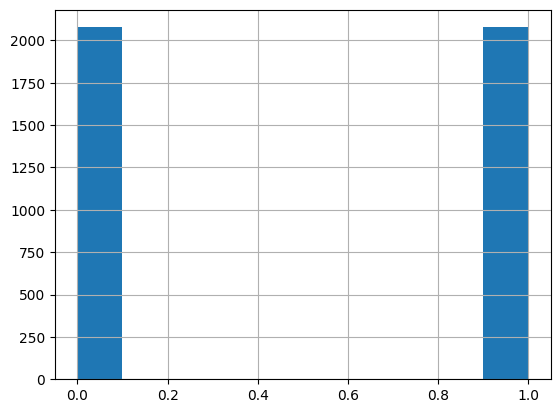

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

y_resampled.hist()
plt.show()

In [ ]:
print(np.isnan(X_resampled).sum())
print(np.isnan(X_test).sum())

0
All Time Rank             0
Track Score               0
Spotify Playlist Count    0
Spotify Playlist Reach    0
Spotify Popularity        0
YouTube Views             0
AirPlay Spins             0
Deezer Playlist Count     0
Pandora Streams           0
Pandora Track Stations    0
dtype: int64


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)
y_pred_knn = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       872
         1.0       0.55      0.69      0.61       508

    accuracy                           0.68      1380
   macro avg       0.67      0.68      0.67      1380
weighted avg       0.70      0.68      0.69      1380



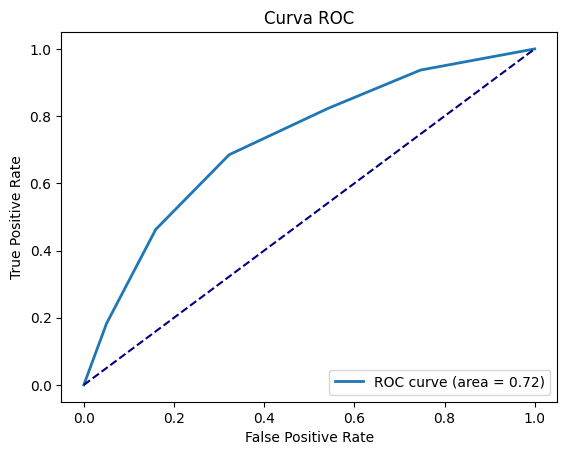

In [ ]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

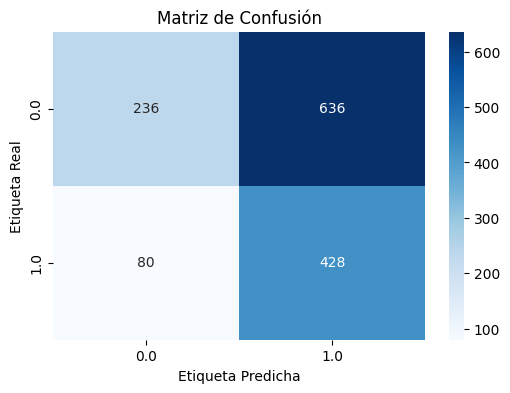

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
gnb = GaussianNB()
gnb.fit(X_resampled, y_resampled)
y_pred = gnb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.27      0.40       872
         1.0       0.40      0.84      0.54       508

    accuracy                           0.48      1380
   macro avg       0.57      0.56      0.47      1380
weighted avg       0.62      0.48      0.45      1380



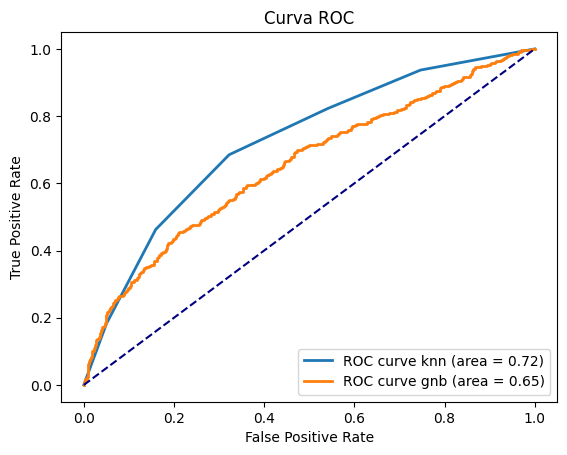

In [ ]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

y_pred_proba = gnb.predict_proba(X_test_scaled)[:, 1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc2 = auc(fpr2, tpr2)


plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve knn (area = {roc_auc:.2f})')
plt.plot(fpr2, tpr2, lw=2, label=f'ROC curve gnb (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()